
# Project: Investigate Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Movies nowadays became an important thing to impact culture , scientific inventions also for fun, and It became a huge industry to get profit, so we are about to investigate the TMDB dataset to answer some questions.

Questions to answer
- What is the most common Actor per years ?
- What is the most common Actor per years ?
- What is the average profit by years ?
- What is the most profitable movie ?
- What is the most loss movie ?
- What is the runtime for all the movies ?

In [39]:
# Importing usable libraries (numpy, Pandas, matplotlib, seaborn) 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

## Reading the data file and exploring the top 5 rows

In [40]:
# Reading the dataset CSV file
df = pd.read_csv('tmdb-movies.csv')
# Printing Top 5 rows to visual notes
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


### Exploring columns headers and type of columns data

In [41]:
# Exploring the columns headers and data types and NAN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Explroring the dataset shape ('How many rows and columns')

In [42]:
# Exploring the dataset shape - The count of columns and rows
df.shape

(10866, 21)

In [43]:
# basic descriptive statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


In [44]:
# Finding Out the duplicated ids
df.id.duplicated().sum()

1

In [45]:
# Exploring Directors Column to see the column data and if it's needs to be splitted or not
df['director'].tolist()

['Colin Trevorrow',
 'George Miller',
 'Robert Schwentke',
 'J.J. Abrams',
 'James Wan',
 'Alejandro GonzÃ¡lez IÃ±Ã¡rritu',
 'Alan Taylor',
 'Ridley Scott',
 'Kyle Balda|Pierre Coffin',
 'Pete Docter',
 'Sam Mendes',
 'Lana Wachowski|Lilly Wachowski',
 'Alex Garland',
 'Chris Columbus',
 'Joss Whedon',
 'Quentin Tarantino',
 'Olivier Megaton',
 'Peyton Reed',
 'Kenneth Branagh',
 'Francis Lawrence',
 'Brad Bird',
 'Antoine Fuqua',
 'Brad Peyton',
 'Sam Taylor-Johnson',
 'Adam McKay',
 'Christopher McQuarrie',
 'Seth MacFarlane',
 'Matthew Vaughn',
 'Tom McCarthy',
 'Wes Ball',
 'Bill Condon',
 'Neill Blomkamp',
 'Elizabeth Banks',
 'Steven Spielberg',
 'Rob Letterman',
 'Lenny Abrahamson',
 'Afonso Poyart',
 'Peter Sohn',
 'Jaume Collet-Serra',
 'John Crowley',
 'F. Gary Gray',
 'Breck Eisner',
 'Danny Boyle',
 'Guy Ritchie',
 'Lee Toland Krieger',
 'Ilya Naishuller',
 'Tim Johnson',
 'Jake Schreier',
 'Simon West',
 'Yorgos Lanthimos',
 'Todd Haynes',
 'Nancy Meyers',
 'Baltasar KormÃ

#### Exploring the hist of the data and showing the values and if it has 0 values

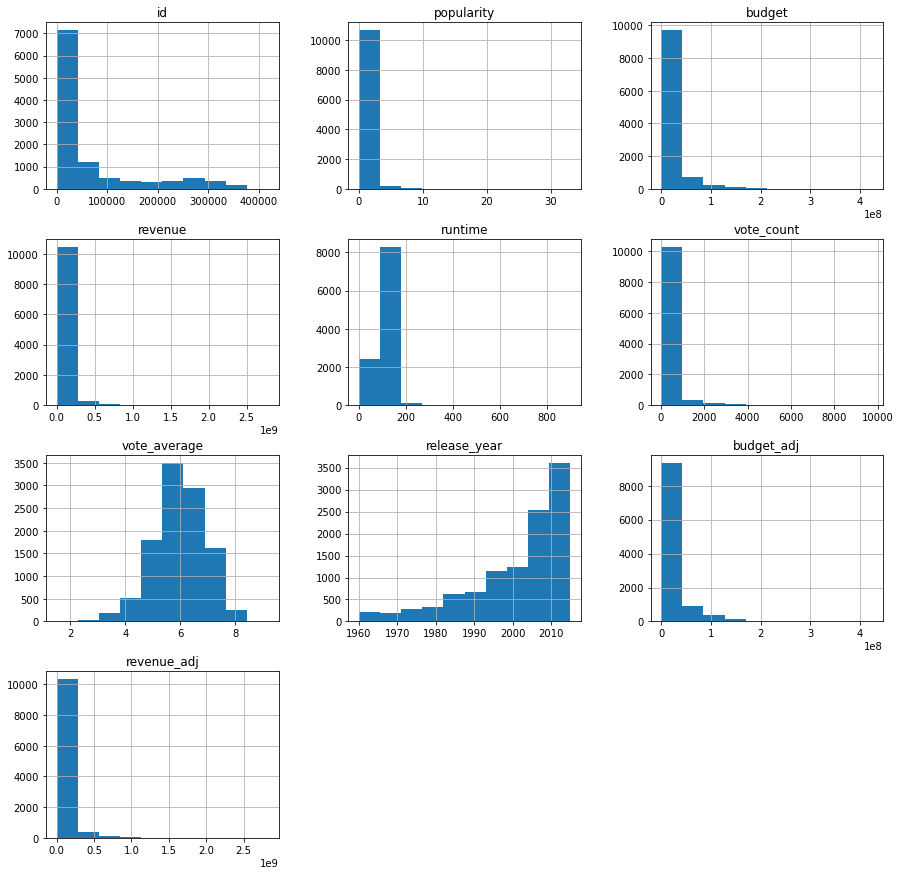

In [46]:
df.hist(figsize=(15,15));

In [47]:
# Exporing the NaN Values in production_companies to see whether we need it or not.
df[df['production_companies'].isna()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,300792,tt1618448,0.58,0,0,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,http://www.racingextinction.com,Louie Psihoyos,It's better to light one candle than curse the...,...,An unlikely team of activists and innovators h...,90,Adventure|Documentary,NaN,1/24/15,36,7.80,2015,0.00,0.00
259,360603,tt5133572,0.48,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,NaN,Alex Zamm,NaN,...,After getting fired from her job as a maid at ...,84,TV Movie,NaN,11/27/15,10,7.60,2015,0.00,0.00
295,363483,tt5133810,0.42,0,0,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,NaN,Peter Sullivan,NaN,...,"When Anna Parisi, an unemployed fine arts pain...",84,Family|TV Movie,NaN,11/26/15,12,6.30,2015,0.00,0.00
298,354220,tt3826866,0.37,0,0,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,NaN,Nick Simon,NaN,...,Images coming from the crimes committed by a d...,95,Crime|Horror|Thriller,NaN,9/14/15,10,4.70,2015,0.00,0.00
328,308457,tt3090670,0.37,0,0,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,NaN,Jennifer Phang,NaN,...,In a near-future city where soaring opulence o...,92,Science Fiction|Drama|Family,NaN,6/23/15,29,6.40,2015,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10804,15867,tt0077742,0.15,0,0,Interiors,Diane Keaton|Kristin Griffith|Mary Beth Hurt|R...,NaN,Woody Allen,NaN,...,Homage to Ingmar Bergman in this family drama ...,93,Drama,NaN,8/2/78,35,6.30,1978,0.00,0.00
10806,24998,tt0077598,0.14,0,0,Gates of Heaven,Lucille Billingsley|Zella Graham|Cal Harberts|...,NaN,Errol Morris,Death is for the living and not for the dead s...,...,"The men who run a pet cemetery, and the men an...",85,Documentary,NaN,10/1/78,12,5.90,1978,0.00,0.00
10816,16378,tt0077147,0.06,0,0,The Rutles: All You Need Is Cash,Eric Idle|John Halsey|Ricky Fataar|Neil Innes|...,NaN,Eric Idle|Gary Weis,NaN,...,The story of the rise and fall of the Pre-Fab ...,76,Comedy,NaN,3/22/78,14,6.00,1978,0.00,0.00
10842,36540,tt0061199,0.25,0,0,Winnie the Pooh and the Honey Tree,Sterling Holloway|Junius Matthews|Sebastian Ca...,NaN,Wolfgang Reitherman,NaN,...,Christopher Robin's bear attempts to raid a be...,25,Animation|Family,NaN,1/1/66,12,7.90,1966,0.00,0.00


### Data Cleaning

#### In this section we will perform the data cleaning process 
- The are 0 values needs to be droped
- Dropping the unusable column
- Removing any duplicated data
- Changing the relase date type to datetime
- Splitting column like cast, genres, directors, and production companies and creating new dataframes to join it with the original dataframe.


In [48]:
"""Changing scientific numbers to numeric numbers"""
#https://stackoverflow.com/questions/38689125/how-to-get-rid-of-pandas-converting-large-numbers-in-excel-sheet-to-exponential
pd.options.display.float_format = '{:.2f}'.format

#### First we need to replace the 0 values to Nan in order to drop them.

In [49]:
# Replacing the 0 values to nan to drop them
df['runtime'].replace(0, np.NAN, inplace=True)
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)

In [50]:
# dropping the nan Values
df.dropna(axis=0, inplace=True)

In [51]:
# Exploring the describtion of the data to be sure that we don't have 0 values or nan
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1287.00,1287.00,1287.00,1287.00,1287.00,1287.00,1287.00,1287.00,1287.00,1287.00
mean,52557.49,1.79,52003492.35,176244438.69,110.27,947.27,6.28,2007.02,54629935.84,199177499.23
std,74450.08,2.17,55145404.35,253815575.82,18.81,1255.48,0.80,8.06,55254627.64,296851462.45
min,11.00,0.01,1.00,43.00,63.00,10.00,2.20,1961.00,0.97,43.00
25%,5851.50,0.66,14000000.00,25650969.50,97.00,179.00,5.80,2005.00,15191799.51,27648902.20
50%,20178.00,1.15,32000000.00,82087155.00,107.00,439.00,6.30,2009.00,35569267.40,86747695.58
75%,62209.50,2.13,70000000.00,214069422.00,121.00,1173.00,6.80,2011.00,76301250.18,235117806.64
max,333348.00,32.99,425000000.00,2781505847.00,201.00,9767.00,8.30,2015.00,425000000.00,2827123750.41


In [52]:
# Droping the unusable data to make data more clean
df= df.drop(['homepage','tagline','overview','keywords','imdb_id','id','budget_adj','revenue_adj'], axis=1)

In [53]:
# Showing the to rows and column headers to be sure from the existing data
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.99,150000000.00,1513528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.00,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015
1,28.42,150000000.00,378436354.00,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.00,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015
2,13.11,110000000.00,295238201.00,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.00,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015
3,11.17,200000000.00,2068178225.00,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.00,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015
4,9.34,190000000.00,1506249360.00,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.00,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015


In [54]:
# Checking if there any duplicated data to remove it
df.duplicated().sum()

0

In [55]:
# Checking the data inforamtion
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            1287 non-null   float64
 1   budget                1287 non-null   float64
 2   revenue               1287 non-null   float64
 3   original_title        1287 non-null   object 
 4   cast                  1287 non-null   object 
 5   director              1287 non-null   object 
 6   runtime               1287 non-null   float64
 7   genres                1287 non-null   object 
 8   production_companies  1287 non-null   object 
 9   release_date          1287 non-null   object 
 10  vote_count            1287 non-null   int64  
 11  vote_average          1287 non-null   float64
 12  release_year          1287 non-null   int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 140.8+ KB


In [56]:
# Changing release_date column type from object to date
df['release_date'] = pd.to_datetime(df['release_date'])

In [57]:
# Checking the data info to be sure that dtype has been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            1287 non-null   float64       
 1   budget                1287 non-null   float64       
 2   revenue               1287 non-null   float64       
 3   original_title        1287 non-null   object        
 4   cast                  1287 non-null   object        
 5   director              1287 non-null   object        
 6   runtime               1287 non-null   float64       
 7   genres                1287 non-null   object        
 8   production_companies  1287 non-null   object        
 9   release_date          1287 non-null   datetime64[ns]
 10  vote_count            1287 non-null   int64         
 11  vote_average          1287 non-null   float64       
 12  release_year          1287 non-null   int64         
dtypes: datetime64[ns]

#### We need to split the cast , director, geners and production comapnies in order to able to use the with the analysis

In [58]:
# Spliting genres, production_companies, directors and cast columns
df_cast = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast{x+1}"))
df_director = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director{x+1}"))
df_genres = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres{x+1}"))
df_prod_co = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies{x+1}"))

In [59]:
# droping genres, production_companies, directors and cast columns from original dataset
df = df.drop(['genres','production_companies','director','cast'], axis=1)

In [60]:
df.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year
0,32.99,150000000.00,1513528810.00,Jurassic World,124.00,2015-06-09,5562,6.50,2015
1,28.42,150000000.00,378436354.00,Mad Max: Fury Road,120.00,2015-05-13,6185,7.10,2015
2,13.11,110000000.00,295238201.00,Insurgent,119.00,2015-03-18,2480,6.30,2015
3,11.17,200000000.00,2068178225.00,Star Wars: The Force Awakens,136.00,2015-12-15,5292,7.50,2015
4,9.34,190000000.00,1506249360.00,Furious 7,137.00,2015-04-01,2947,7.30,2015


In [61]:
# Join the new splitted columns to the original dataset
df = df.join([df_cast,df_director,df_genres,df_prod_co])

In [62]:
# Exploring the new dataset
df.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,cast1,...,genres1,genres2,genres3,genres4,genres5,production_companies1,production_companies2,production_companies3,production_companies4,production_companies5
0,32.99,150000000.00,1513528810.00,Jurassic World,124.00,2015-06-09,5562,6.50,2015,Chris Pratt,...,Action,Adventure,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,28.42,150000000.00,378436354.00,Mad Max: Fury Road,120.00,2015-05-13,6185,7.10,2015,Tom Hardy,...,Action,Adventure,Science Fiction,Thriller,None,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,13.11,110000000.00,295238201.00,Insurgent,119.00,2015-03-18,2480,6.30,2015,Shailene Woodley,...,Adventure,Science Fiction,Thriller,None,None,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,11.17,200000000.00,2068178225.00,Star Wars: The Force Awakens,136.00,2015-12-15,5292,7.50,2015,Harrison Ford,...,Action,Adventure,Science Fiction,Fantasy,None,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,9.34,190000000.00,1506249360.00,Furious 7,137.00,2015-04-01,2947,7.30,2015,Vin Diesel,...,Action,Crime,Thriller,None,None,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [63]:
# Checking the duplicated movie names
df['original_title'].value_counts().head()

Halloween II            2
The Fog                 2
The Three Musketeers    2
Halloween               2
The Thing               2
Name: original_title, dtype: int64

In [64]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,1287.00,1287.00,1287.00,1287.00,1287.00,1287.00,1287.00
mean,1.79,52003492.35,176244438.69,110.27,947.27,6.28,2007.02
std,2.17,55145404.35,253815575.82,18.81,1255.48,0.80,8.06
min,0.01,1.00,43.00,63.00,10.00,2.20,1961.00
25%,0.66,14000000.00,25650969.50,97.00,179.00,5.80,2005.00
50%,1.15,32000000.00,82087155.00,107.00,439.00,6.30,2009.00
75%,2.13,70000000.00,214069422.00,121.00,1173.00,6.80,2011.00
max,32.99,425000000.00,2781505847.00,201.00,9767.00,8.30,2015.00


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   popularity             1287 non-null   float64       
 1   budget                 1287 non-null   float64       
 2   revenue                1287 non-null   float64       
 3   original_title         1287 non-null   object        
 4   runtime                1287 non-null   float64       
 5   release_date           1287 non-null   datetime64[ns]
 6   vote_count             1287 non-null   int64         
 7   vote_average           1287 non-null   float64       
 8   release_year           1287 non-null   int64         
 9   cast1                  1287 non-null   object        
 10  cast2                  1285 non-null   object        
 11  cast3                  1285 non-null   object        
 12  cast4                  1283 non-null   object        
 13  ca

#### Data seems to be clean and ready for analysis
- no duplicated data
- column have been splitted
- unusable columns have been removed
- columns data type ready and changes needed have been done
- Zero values have been dropped.

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What is the most common genres by years ?)

### In this section we will create a new dataframe for genres and adding to the new df the release year to create a new df for the most common genres by years

In [66]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# Selecting genres columns for the analysis of the original data frame
df_genres = df.loc[:, 'genres1': 'genres5' ]
# Adding release year to df_genres
df_genres_dates = df_genres.join(df['release_year'])

In [67]:
#creates an array of years mentioned in release year 
years = df_genres_dates['release_year'].unique() 
#creates a list of tuples for most common genres in specific years
most_common = [] 

#for loop to create most_common list
for year in years:
    #creates df filtered by every year mentioned in years
    m = df_genres_dates[df_genres_dates['release_year'] == year] 
    #drops columns "release_year to perferm stack value count in next line
    b = m.drop(['release_year'], axis = 1)
    #performs value count trough genres1 - genres5 and stores the index of maximum count
    t = b.stack().value_counts().idxmax() 

    #creates a masked DataFrame for respective years
    f = df[df['release_year'] == year]
    #creates the mean of vote_average and stores the index of maximum value
    g = f.groupby(['genres1'])['vote_average'].mean().idxmax()

        #appends year with value count trough genres1 - genres5, the highest average vote_average and indicates if the resulting columns match
    most_common.append((year, t, g))

#creates df_most_popular
df_most_popular = pd.DataFrame(most_common, columns=['release_year', 'popular_produced_genres', 'popular_voted_genres']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_most_popular

,release_year,popular_produced_genres,popular_voted_genres
0,1961,Comedy,Comedy
1,1962,Action,Adventure
2,1963,Thriller,Action
3,1964,Thriller,Adventure
4,1965,Action,Adventure
5,1967,Thriller,Action
6,1969,Action,Adventure
7,1971,Thriller,Action
8,1972,Drama,Drama
9,1973,Thriller,Drama


#### Above a list for the most common genres be years from 1961 to 2015

### Research Question 2  (What is the most common Actor per years ?)

#### In this section we will create a new dataframe for actors and adding to the new df the release year to create a new df for the most common actors by years
to see who is the most performing actor per year by year

In [68]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# Selecting cast columns for the analysis of the original data frame
df_casts = df.loc[:, 'cast1': 'cast5' ]
# Adding release year to df_casts
df_casts_dates = df_casts.join(df['release_year'])

In [69]:
#creates an array of years mentioned in release year 
years = df_casts_dates['release_year'].unique() 
#creates a list of tuples for most common genres in specific years
most_common = [] 

#for loop to create most_common list
for year in years:
    #creates df filtered by every year mentioned in years
    m = df_casts_dates[df_casts_dates['release_year'] == year] 
    #drops columns "release_year to perferm stack value count in next line
    b = m.drop(['release_year'], axis = 1)
    #performs value count trough cast1 - cast5 and stores the index of maximum count
    t = b.stack().value_counts().idxmax() 

    #creates a masked DataFrame for respective years
    f = df[df['release_year'] == year]
    #creates the mean of vote_average and stores the index of maximum value
    g = f.groupby(['cast1'])['vote_average'].mean().idxmax()

        #appends year with value count trough cast1 - cast5, the highest average vote_average and indicates if the resulting columns match
    most_common.append((year, t, g))

#creates df_most_popular
df_most_popular = pd.DataFrame(most_common, columns=['release_year', 'popular_produced_cast', 'popular_voted_cast']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_most_popular

,release_year,popular_produced_cast,popular_voted_cast
0,1961,Pamela Tiffin,James Cagney
1,1962,Joseph Wiseman,Sean Connery
2,1963,Sean Connery,Sean Connery
3,1964,Honor Blackman,Sean Connery
4,1965,Sean Connery,Sean Connery
5,1967,Sean Connery,Sean Connery
6,1969,Ilse Steppat,George Lazenby
7,1971,Reni Santoni,Clint Eastwood
8,1972,James Caan,Marlon Brando
9,1973,Clifton James,Linda Blair


#### Above a list for the most common actors "by production and also voting" be years from 1961 to 2015

### In this section we will create a new dataframe and create a profit column to see the average profit per years and the most profitable movie and also the most loss movie

In [70]:
df_profit = df

In [71]:
list(df_profit.columns)

['popularity',
 'budget',
 'revenue',
 'original_title',
 'runtime',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'cast1',
 'cast2',
 'cast3',
 'cast4',
 'cast5',
 'director1',
 'director2',
 'director3',
 'director4',
 'director5',
 'director6',
 'genres1',
 'genres2',
 'genres3',
 'genres4',
 'genres5',
 'production_companies1',
 'production_companies2',
 'production_companies3',
 'production_companies4',
 'production_companies5']

In [72]:
df_profit = df_profit.drop([
 'release_date',
 'vote_count',
 'vote_average',
 'cast1',
 'cast2',
 'cast3',
 'cast4',
 'cast5',
 'director1',
 'director2',
 'director3',
 'director4',
 'director5',
 'director6',
 'genres1',
 'genres2',
 'genres3',
 'genres4',
 'genres5'], axis=1)

In [73]:
df_profit.head()

,popularity,budget,revenue,original_title,runtime,release_year,production_companies1,production_companies2,production_companies3,production_companies4,production_companies5
0,32.99,150000000.00,1513528810.00,Jurassic World,124.00,2015,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,28.42,150000000.00,378436354.00,Mad Max: Fury Road,120.00,2015,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,13.11,110000000.00,295238201.00,Insurgent,119.00,2015,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,11.17,200000000.00,2068178225.00,Star Wars: The Force Awakens,136.00,2015,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,9.34,190000000.00,1506249360.00,Furious 7,137.00,2015,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


#### Creating a new column for profit by substracting the budget from the revenue 

In [74]:
df_profit.insert(3,"profit",df["revenue"] - df["budget"])
df_profit.head()

,popularity,budget,revenue,profit,original_title,runtime,release_year,production_companies1,production_companies2,production_companies3,production_companies4,production_companies5
0,32.99,150000000.00,1513528810.00,1363528810.00,Jurassic World,124.00,2015,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,28.42,150000000.00,378436354.00,228436354.00,Mad Max: Fury Road,120.00,2015,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,13.11,110000000.00,295238201.00,185238201.00,Insurgent,119.00,2015,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,11.17,200000000.00,2068178225.00,1868178225.00,Star Wars: The Force Awakens,136.00,2015,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,9.34,190000000.00,1506249360.00,1316249360.00,Furious 7,137.00,2015,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [75]:
# definding a function to calculate the mean for column2 and groupby by column1
def groupby_avg(column1,column2):
    avg_gb_data = df_profit.groupby(column1)[column2].mean()
    return avg_gb_data

### Research Question 3  (What is the average profit by years ?)

Text(0, 0.5, 'Profit')

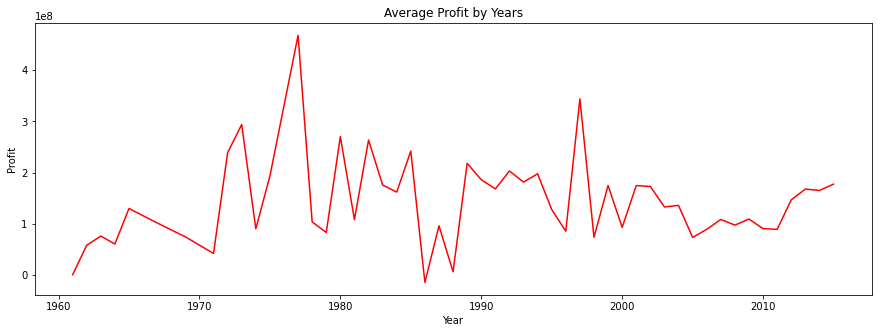

In [76]:
avg_profit_year = groupby_avg("release_year","profit")

# plot relationship between release_year and profit
avg_profit_year.plot(kind='line',color='red',title='Average Profit by Years',figsize = (15,5))
# x-axis name
plt.xlabel('Year')
# y-axis name
plt.ylabel('Profit')

In [77]:
# desplaying the describe of the dataset to find the max and min
df_profit.describe()

,popularity,budget,revenue,profit,runtime,release_year
count,1287.00,1287.00,1287.00,1287.00,1287.00,1287.00
mean,1.79,52003492.35,176244438.69,124240946.33,110.27,2007.02
std,2.17,55145404.35,253815575.82,218346199.83,18.81,8.06
min,0.01,1.00,43.00,-413912431.00,63.00,1961.00
25%,0.66,14000000.00,25650969.50,3142641.00,97.00,2005.00
50%,1.15,32000000.00,82087155.00,45243000.00,107.00,2009.00
75%,2.13,70000000.00,214069422.00,147006968.50,121.00,2011.00
max,32.99,425000000.00,2781505847.00,2544505847.00,201.00,2015.00


### Research Question 4  (What is the most profitable movie ?)

In [78]:
# Finding the most profitable movie
df_profit.query('profit == 2544505847.00')

,popularity,budget,revenue,profit,original_title,runtime,release_year,production_companies1,production_companies2,production_companies3,production_companies4,production_companies5
1386,9.43,237000000.00,2781505847.00,2544505847.00,Avatar,162.00,2009,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment,Lightstorm Entertainment,None


### Research Question 5  (What is the most loss movie ?)

In [79]:
# the top loss movie
df_profit.query('profit == -413912431.00')

,popularity,budget,revenue,profit,original_title,runtime,release_year,production_companies1,production_companies2,production_companies3,production_companies4,production_companies5
2244,0.25,425000000.00,11087569.00,-413912431.00,The Warrior's Way,100.00,2010,Boram Entertainment Inc.,None,None,None,None


In [80]:
df['runtime'].describe()

count   1287.00
mean     110.27
std       18.81
min       63.00
25%       97.00
50%      107.00
75%      121.00
max      201.00
Name: runtime, dtype: float64

#### The maximun runtime is 201 and the avarage runtime 110 mins.

### Research Question 6  (What is the runtime for all the movies ?)

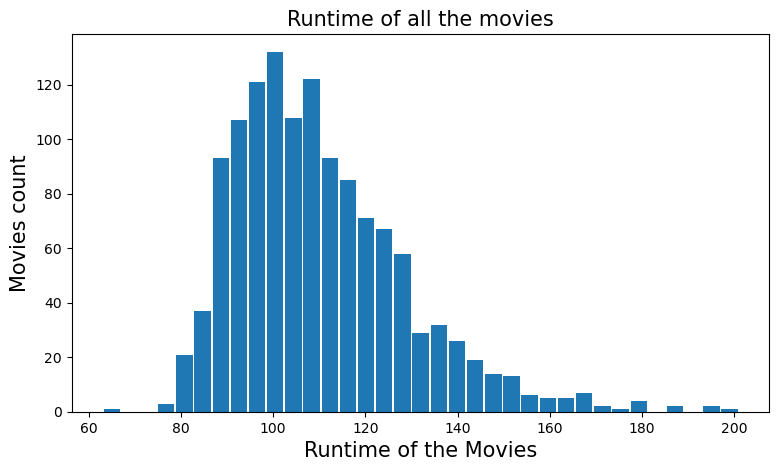

In [81]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Movies count', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

<a id='conclusions'></a>
## Conclusions

After investigating the data set we can now answer so many questions so the first one was 'What is the most common Actor per years ?' and we have got a list for all years as example starting with 1961 Comedy and 2015 Drama, and also 'What is the most common Actor per years ?'  and we have got alist for all years as example in 1961 was Howard St. John and in 2015 was Domhnall Gleeson, Also we have got the average profit chart and the max was between 1970 and 1980 as an answer to 'What is the average profit by years ?' 
The most profitable movie was 'Avatar' released in 2009 produced by Ingenious Film Partners ,Twentieth Century Fox Film Corporation	,Dune Entertainment, and Lightstorm Entertainment, with profit 2,544,505,847 as an answer for 'What is the most profitable movie ?'
The Most loss movie was 'The Warrior's Way' released in 2010 produced by Boram Entertainment Inc. with loss 413,912,431 as an answer for 'What is the most loss movie ?'
And we have got that the average runtime was 110 mins and the max was 201 mins and more with a chart indecates as an answer for 'What is the runtime for all the movies ?'


## Limitations
- There are so many missing values.
- more than one data in the same column such as genres
- some movies runtime was weird
- there are duplicated movies names without being the same movie in fact.